<a href="https://colab.research.google.com/github/acaicomdados/analise-reservatorios-federais/blob/main/An%C3%A1lise%20feito%20nos%20encontros/An%C3%A1lise_reservat%C3%B3rio_dia_22_06_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dia 22/06/24

Hoje será continuação da análise feita semana passada e continuaremos com análise e formação de hipoteses para desencadear o que vai nos nortear futuramente

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
url = 'https://raw.githubusercontent.com/acaicomdados/analise-reservatorios-federais/main/Datasets/reservatorio_geral_codigo_aneel.csv'
reservatorio = pd.read_csv(url)
reservatorio.drop(['Unnamed: 0','id_empreendimento_aneel','id_reservatorio_planejamento','id_posto_vazao',
                   'codigo'],axis=1,inplace=True)
reservatorio.head()

,data,subsistema,reservatorio_equivalente,reservatorio,tipo_reservatorio,usina,bacia,rio,cota_maxima,cota_minima,...,volume_minimo,volume_util,produtividade_especifica,produtividade_65_volume_util,tipo_perda,perda_carga,latitude,longitude,sistema,estado_sigla
0,2007-02-03,SUL,SUL,CAMPOS NOVOS,RESERVATORIO COM USINA,CAMPOS NOVOS,URUGUAI,CANOAS,660.0,655.0,...,1320.00,129.62,0.009083,1.6063,m,2.48,-27.603056,-51.323611,sin,SC
1,2005-11-01,SUL,SUL,BARRA GRANDE,RESERVATORIO COM USINA,BARRA GRANDE,URUGUAI,PELOTAS,647.0,617.0,...,2711.79,2192.66,0.009218,1.4153,m,2.79,-27.777222,-51.188611,sin,SC
2,2005-11-01,SUL,SUL,BARRA GRANDE,RESERVATORIO COM USINA,BARRA GRANDE,URUGUAI,PELOTAS,647.0,617.0,...,2711.79,2192.66,0.009218,1.4153,m,2.79,-27.777222,-51.188611,sin,RS
3,2013-09-24,SUL,SUL,GARIBALDI,RESERVATORIO COM USINA,GARIBALDI,URUGUAI,CANOAS,705.0,702.5,...,232.00,64.23,0.008626,0.3691,m,1.19,-27.624722,-50.983889,sin,SC
4,2002-02-16,SUL,SUL,MACHADINHO,RESERVATORIO COM USINA,MACHADINHO,URUGUAI,URUGUAI,480.0,465.0,...,2283.00,1055.81,0.009034,0.8779,m,1.48,-27.524444,-51.788889,sin,SC


In [16]:
reservatorio.columns

Index(['data', 'subsistema', 'reservatorio_equivalente', 'reservatorio',
       'tipo_reservatorio', 'usina', 'bacia', 'rio', 'cota_maxima',
       'cota_minima', 'volume_maximo', 'volume_minimo', 'volume_util',
       'produtividade_especifica', 'produtividade_65_volume_util',
       'tipo_perda', 'perda_carga', 'latitude', 'longitude', 'sistema',
       'estado_sigla'],
      dtype='object')

In [8]:
reservatorio['tipo_reservatorio'] = reservatorio['tipo_reservatorio'].str.replace('RESERVATORIO COM USINA DE BOMBEAMENTO',
                                                                                  'USINA DE BOMBEAMENTO')
reservatorio['tipo_reservatorio'] = reservatorio['tipo_reservatorio'].str.replace('RESERVATORIO COM USINA',
                                                                                  'USINA COM RESERVATORIO ')
reservatorio['tipo_reservatorio'] = reservatorio['tipo_reservatorio'].str.capitalize()

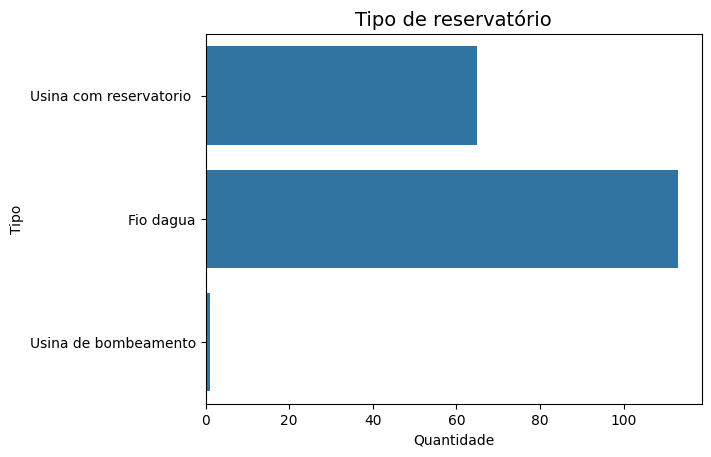

In [9]:
plt.title('Tipo de reservatório',fontsize=14)
sns.countplot(y='tipo_reservatorio',data=reservatorio)
plt.xlabel('Quantidade')
plt.ylabel('Tipo');

- Usina a fio d’água: Usina hidrelétrica sem reservatório de acumulação. O barramento foi construído apenas com intuito de ter uma queda d’água e o volume armazenado no reservatório não é capaz de manter o funcionamento da usina por mais do que uma semana.
- Usina com reservatório: Usinas nas quais o reservatório construído têm um volume armazenado capaz de atender as demandas por longo período de tempo (meses a anos).
- Usina de bombeamento: Usinas construídas para o bombeamento d’água, transposição de rios.

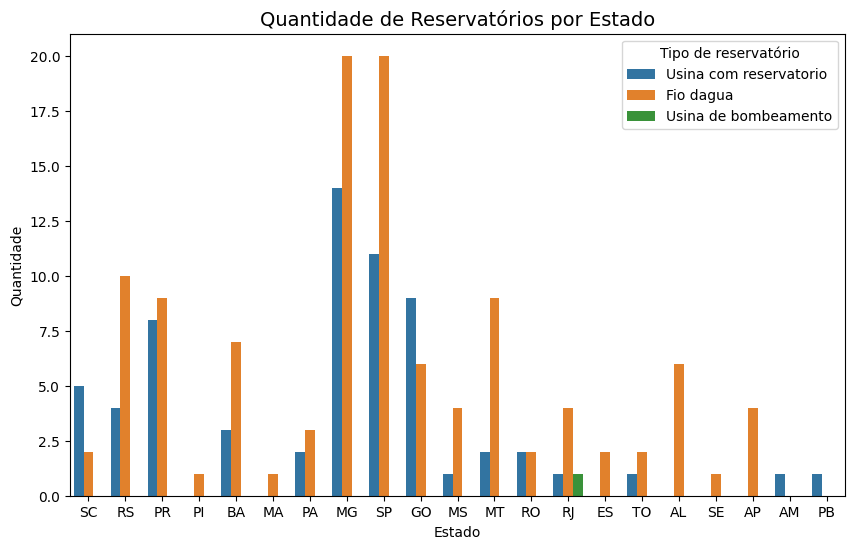

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='estado_sigla',data=reservatorio,hue='tipo_reservatorio')
plt.title('Quantidade de Reservatórios por Estado',fontsize=14)
plt.xlabel('Estado')
plt.ylabel('Quantidade')
plt.legend(title='Tipo de reservatório');

- Temos Estados que só tem fio d´agua com Pi, Ma, Al, Se e AP
- AM e PB só temos usinas com reservatório
- e todas as usina de bombeamento estão no Rj


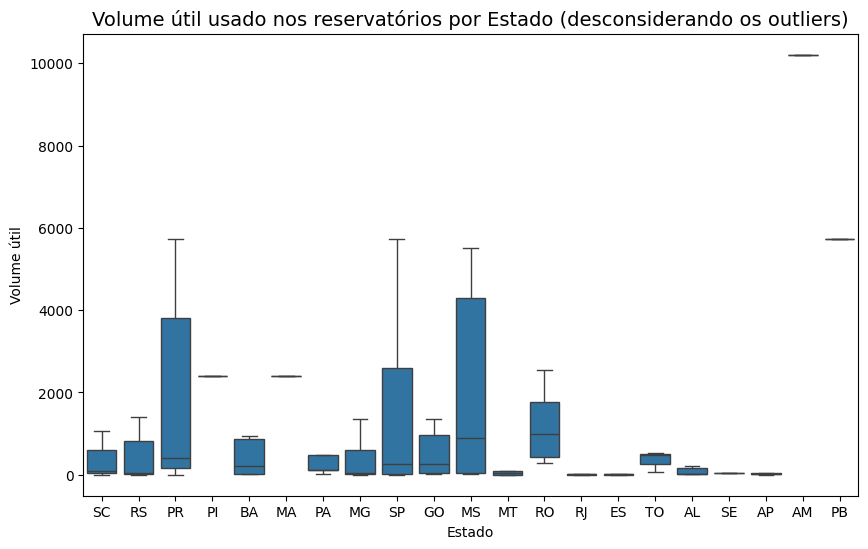

In [15]:
plt.figure(figsize=(10,6))
plt.title('Volume útil usado nos reservatórios por Estado (desconsiderando os outliers)',
          fontsize=14)
sns.boxplot(x='estado_sigla',y='volume_util',data=reservatorio,showfliers=False)
plt.xlabel('Estado')
plt.ylabel('Volume útil');

Text(0, 0.5, 'Volume útil')

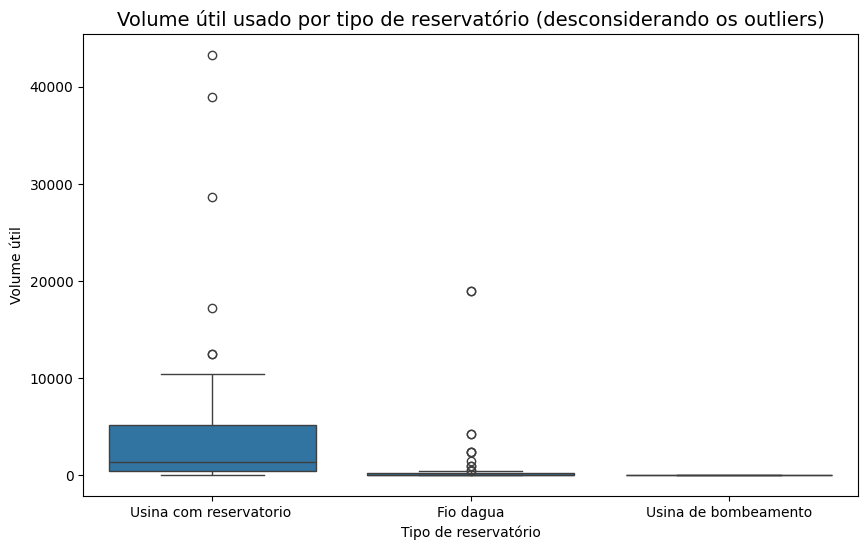

In [27]:
plt.figure(figsize=(10,6))
plt.title('Volume útil usado por tipo de reservatório (desconsiderando os outliers)',
          fontsize=14)
sns.boxplot(x='tipo_reservatorio',y='volume_util',data=reservatorio)
plt.xlabel('Tipo de reservatório')
plt.ylabel('Volume útil')

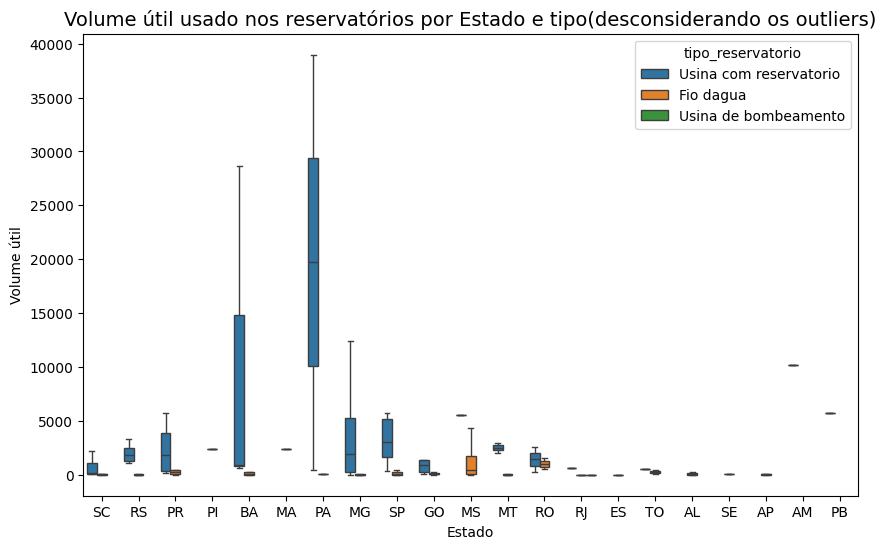

In [29]:
plt.figure(figsize=(10,6))
plt.title('Volume útil usado nos reservatórios por Estado e tipo(desconsiderando os outliers)',
          fontsize=14)
sns.boxplot(x='estado_sigla',y='volume_util',data=reservatorio, hue='tipo_reservatorio',showfliers=False)
plt.xlabel('Estado')
plt.ylabel('Volume útil');

<Axes: xlabel='estado_sigla', ylabel='produtividade_especifica'>

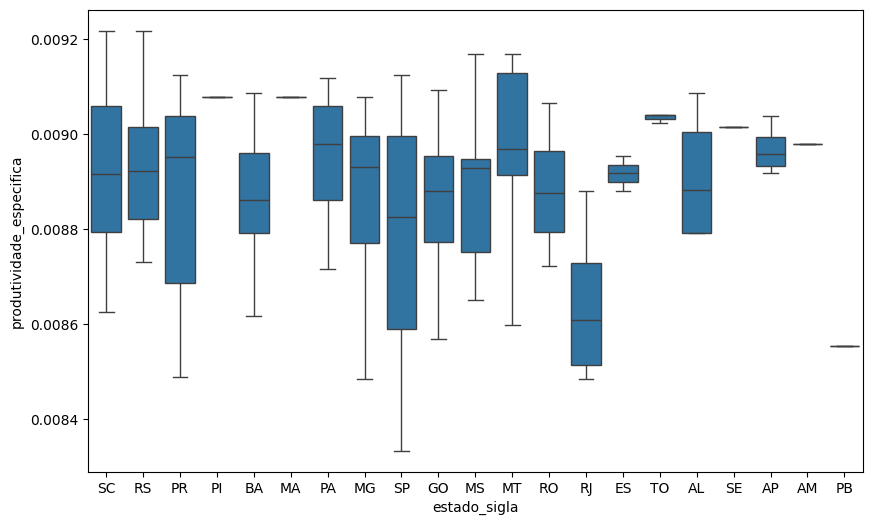

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(x='estado_sigla',y='produtividade_especifica',data=reservatorio,showfliers=False)

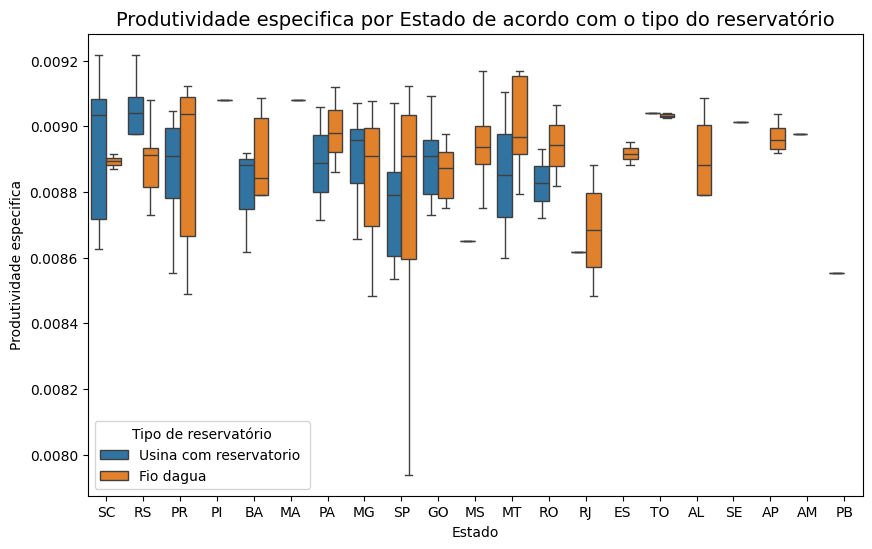

In [41]:
plt.figure(figsize=(10,6))
plt.title('Produtividade especifica por Estado de acordo com o tipo do reservatório',
          fontsize=14)
sns.boxplot(x='estado_sigla',y='produtividade_especifica',data=reservatorio[reservatorio['tipo_reservatorio']!='Usina de bombeamento']
            ,showfliers=False,
             hue='tipo_reservatorio')
plt.legend(title='Tipo de reservatório')
plt.xlabel('Estado')
plt.ylabel('Produtividade especifica');

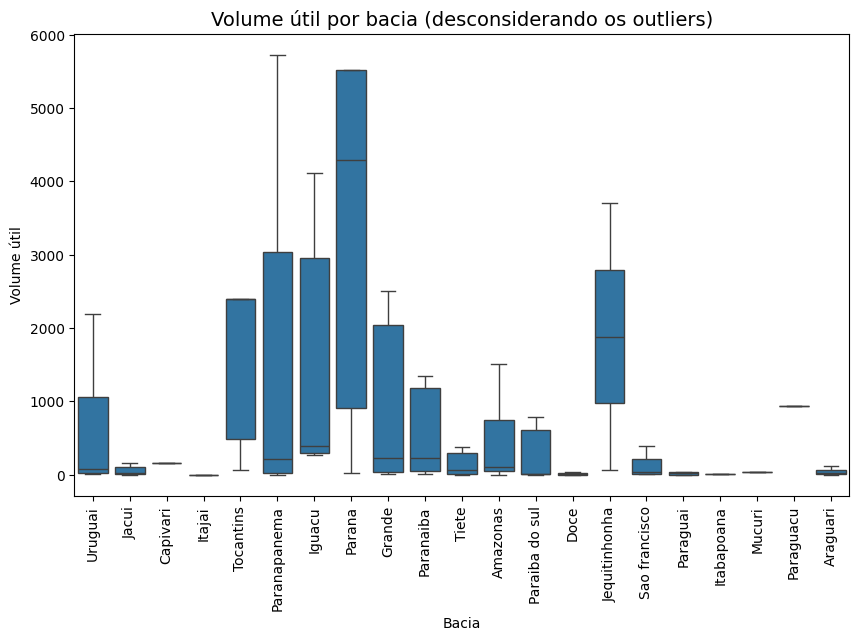

In [47]:
reservatorio['bacia'] = reservatorio['bacia'].str.capitalize()

plt.figure(figsize=(10,6))
plt.title('Volume útil por bacia (desconsiderando os outliers)',fontsize=14)
sns.boxplot(x='bacia',y='volume_util',data=reservatorio,showfliers=False)
plt.xticks(rotation=90)
plt.xlabel('Bacia')
plt.ylabel('Volume útil');

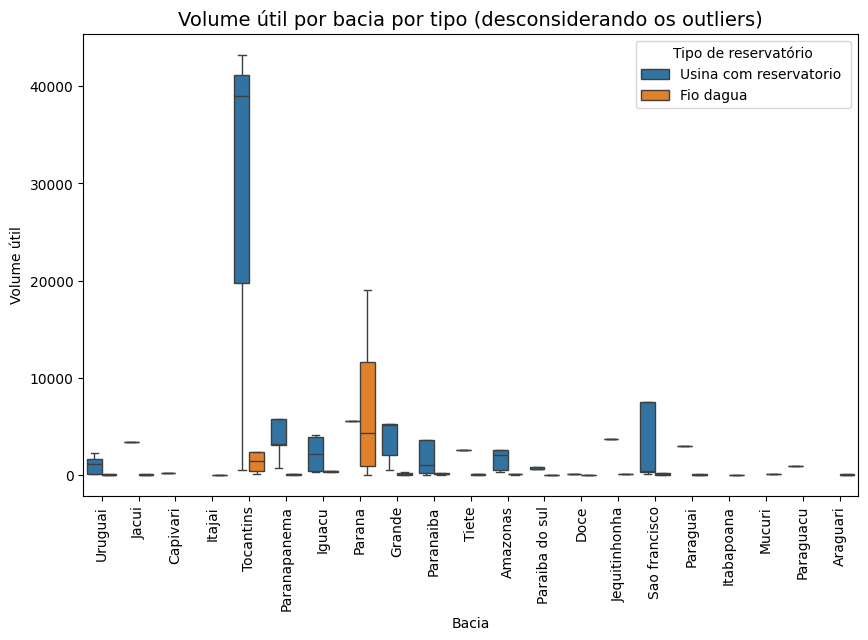

In [52]:
plt.figure(figsize=(10,6))
plt.title('Volume útil por bacia por tipo (desconsiderando os outliers)',fontsize=14)
sns.boxplot(x='bacia',y='volume_util',showfliers=False,
            data=reservatorio[reservatorio['tipo_reservatorio']!='Usina de bombeamento'],
            hue='tipo_reservatorio')
plt.xticks(rotation=90)
plt.xlabel('Bacia')
plt.ylabel('Volume útil')
plt.legend(title='Tipo de reservatório');

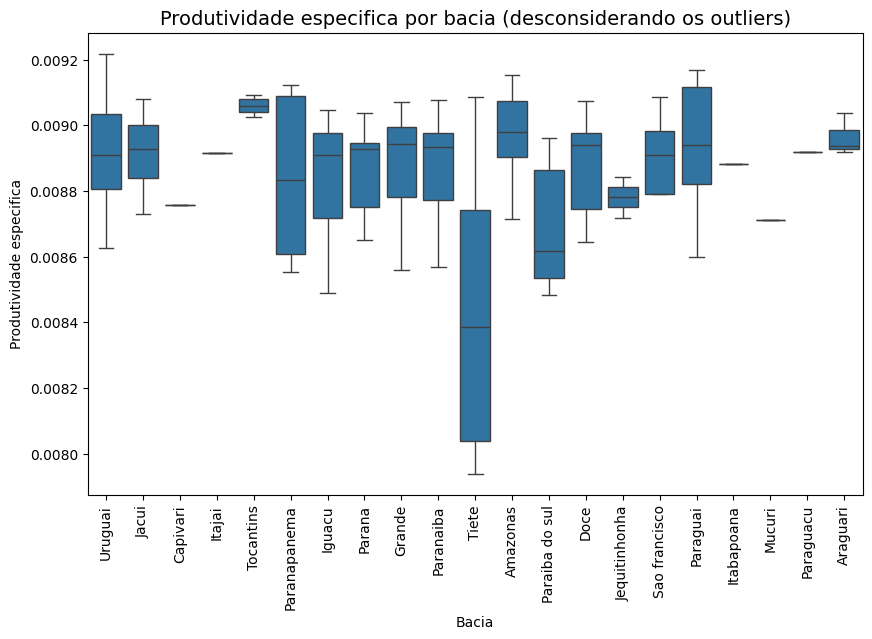

In [51]:
plt.figure(figsize=(10,6))
plt.title('Produtividade especifica por bacia (desconsiderando os outliers)',fontsize=14)
sns.boxplot(x='bacia',y='produtividade_especifica',data=reservatorio,showfliers=False)
plt.xticks(rotation=90)
plt.xlabel('Bacia')
plt.ylabel('Produtividade especifica');

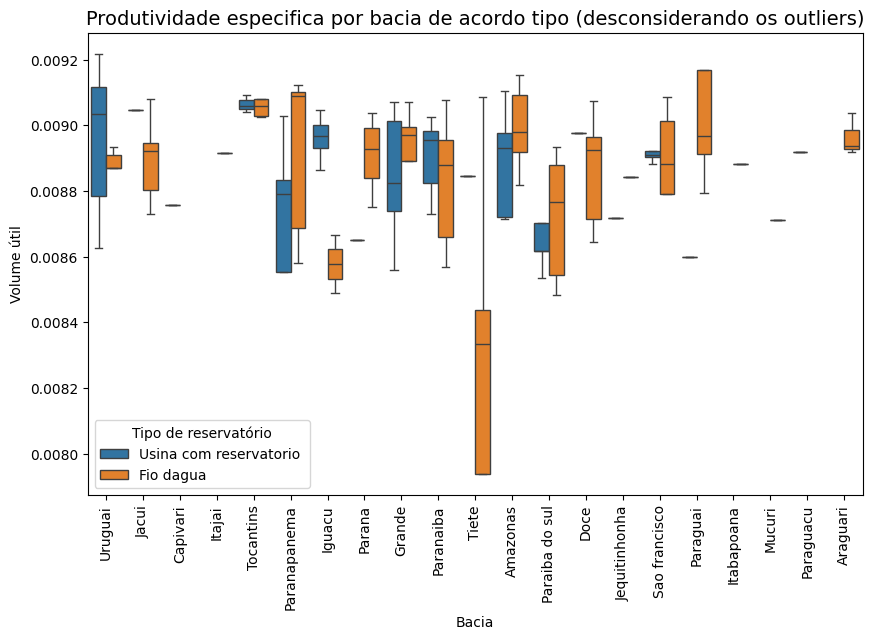

In [54]:
plt.figure(figsize=(10,6))
plt.title('Produtividade especifica por bacia de acordo tipo (desconsiderando os outliers)',fontsize=14)
sns.boxplot(y='produtividade_especifica',x='bacia',showfliers=False,
            data=reservatorio[reservatorio['tipo_reservatorio']!='Usina de bombeamento'],
            hue='tipo_reservatorio')
plt.xticks(rotation=90)
plt.xlabel('Bacia')
plt.ylabel('Volume útil')
plt.legend(title='Tipo de reservatório');

In [56]:
reservatorio.columns

Index(['data', 'subsistema', 'reservatorio_equivalente', 'reservatorio',
       'tipo_reservatorio', 'usina', 'bacia', 'rio', 'cota_maxima',
       'cota_minima', 'volume_maximo', 'volume_minimo', 'volume_util',
       'produtividade_especifica', 'produtividade_65_volume_util',
       'tipo_perda', 'perda_carga', 'latitude', 'longitude', 'sistema',
       'estado_sigla'],
      dtype='object')

In [75]:
mapa_tipo = px.scatter_mapbox(reservatorio, lat="latitude", lon="longitude", hover_name="reservatorio",
                              hover_data=["bacia", "rio"],color='tipo_reservatorio',
                              title='Mapa com os reservatórios de acordo com o tipo',
                              labels={'tipo_reservatorio':'Tipo do reservatorio'})
mapa_tipo.update_layout(mapbox_style="open-street-map")
mapa_tipo.show()

In [76]:
volume_util = px.scatter_geo(reservatorio,lat="latitude", lon="longitude",hover_name='reservatorio',
                             color='tipo_reservatorio',size='volume_util',
                             title='Volume útil por reservatório',
                             labels={'tipo_reservatorio':'Tipo do reservatorio'})
volume_util.update_layout(geo_scope='south america')
volume_util.show()